<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Week_7/NaiveBayesImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with Naive Bayes classifier

In this colab, we will use Naive Bayes classifier for classifying text. Naive Bayes classifier is used for text classification and spam detection tasks.

In [1]:
# Data loading
from sklearn.datasets import fetch_20newsgroups

# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Model/estimator
from sklearn.naive_bayes import MultinomialNB

# Pipeline utility
from sklearn.pipeline import make_pipeline, Pipeline

# Model evaluation
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting library
import matplotlib.pyplot as plt


**Exercise:** Read about [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer#sklearn.feature_extraction.text.TfidfVectorizer) API.

## Dataset

We will be using 20 newsgroup data set for classification.  

As a first step, let's download 20 newsgroup dataset with `fetch_20newsgroups` API.

In [2]:
data = fetch_20newsgroups()

In [8]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Let's look at the names of the classes.

In [15]:
data.filenames.shape, data.target.shape

((11314,), (11314,))

In [18]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

There are **20 categories** in the dataset.  For simplicity, we will select **4** of these categories and download training and test sets.

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Let's look at a sample training document:

In [20]:
print(train.data[6])

From: will@rins.ryukoku.ac.jp (William Reiken)
Subject: Re: nuclear waste
Organization: Ryukoku Univ., Seta, Japan
Lines: 4


	Thanks for the Update.

							Will...



This data is different than what we have seen so far.  Here the training data contains document in text form.  



## Data preprocessing and modeling

We need to convert the text data to numeric form. `TfidfVectorizer` is one such API that converts text input into a vector of numerical values. We will use it as a preprocessing step to obtain feature vector corresponding to the text document.

We will be using multinomial naive Bayes classifier for categorizing documents from 20newsgroup corpus.

In [21]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Let's train the model.

In [22]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

## Model evaluation

Let's first predict the labels for the test set and then calculate the confusion matrix for the test set.

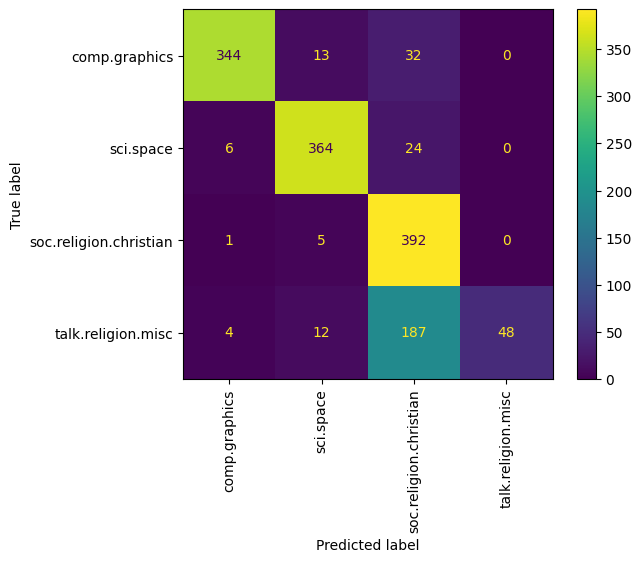

In [25]:
ConfusionMatrixDisplay.from_estimator(
    model, test.data, test.target,
    display_labels=test.target_names,
    xticks_rotation='vertical')

Observe that:
* There is a confusion between documents of class `soc.religion.christian` and `talk.religion.misc`, which is along the expected lines.
* The classes `comp.graphics` and `sci.space` are well separated by such a simple classifier.

Now we have a tool to classify statements into one of these four classes.  

- Make use of `predict` function on pipeline for predicting category of a test string.

In [26]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Using this function for prediction:

In [27]:
predict_category('Exoplanet habitat')

'sci.space'

In [28]:
predict_category('discussing christianity crusade')

'soc.religion.christian'

In [29]:
predict_category('determining the screen resolution')

'comp.graphics'